In [538]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [539]:
import warnings

warnings.filterwarnings('ignore', category=Warning)  # Ignore all warnings

In [540]:
data = pd.read_csv("LifeExpectancy (2).csv")

In [582]:
pd.set_option("display.max_columns",None)

In [542]:
data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,Zimbabwe,2004,Developing,44.3,723,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2924,Zimbabwe,2003,Developing,44.5,715,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2925,Zimbabwe,2002,Developing,44.8,73,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2926,Zimbabwe,2001,Developing,45.3,686,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [543]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2928 entries, 0 to 2927
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2928 non-null   object 
 1   Year                             2928 non-null   int64  
 2   Status                           2928 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   int64  
 5   infant deaths                    2928 non-null   int64  
 6   Alcohol                          2735 non-null   float64
 7   percentage expenditure           2928 non-null   float64
 8   Hepatitis B                      2375 non-null   float64
 9   Measles                          2928 non-null   int64  
 10   BMI                             2896 non-null   float64
 11  under-five deaths                2928 non-null   int64  
 12  Polio               

In [544]:
data.duplicated().sum()

0

In [545]:
data.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            193
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                32
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                443
Population                         644
 thinness  1-19 years               32
 thinness 5-9 years                 32
Income composition of resources    160
Schooling                          160
dtype: int64

In [546]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2928.00000,2928.000000,2928.000000,2928.000000,2735.000000,2928.000000,2375.000000,2928.000000,2896.000000,2928.000000,2909.000000,2702.000000,2909.000000,2928.000000,2485.000000,2.284000e+03,2896.000000,2896.000000,2768.000000,2768.000000
mean,2007.50000,69.224932,164.796448,30.407445,4.614856,740.321185,80.960842,2427.855874,38.235394,42.179303,82.548298,5.930163,82.321416,1.747712,7494.210719,1.276454e+07,4.850622,4.881423,0.627419,11.999639
std,4.61056,9.523867,124.292079,118.114450,4.050749,1990.930605,25.018337,11485.970937,19.959590,160.700547,23.416674,2.483273,23.706644,5.085542,14282.251492,6.103765e+07,4.420829,4.509609,0.210978,3.346440
min,2000.00000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2003.75000,63.100000,74.000000,0.000000,0.905000,4.853964,77.000000,0.000000,19.300000,0.000000,78.000000,4.260000,78.000000,0.100000,463.852618,1.966738e+05,1.600000,1.575000,0.493000,10.100000
50%,2007.50000,72.100000,144.000000,3.000000,3.770000,65.611455,92.000000,17.000000,43.350000,4.000000,93.000000,5.750000,93.000000,0.100000,1764.973870,1.391756e+06,3.300000,3.400000,0.677000,12.300000
75%,2011.25000,75.700000,228.000000,22.000000,7.715000,442.614322,97.000000,362.250000,56.100000,28.000000,97.000000,7.490000,97.000000,0.800000,5932.899677,7.426746e+06,7.200000,7.200000,0.779250,14.300000
max,2015.00000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,77.600000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [547]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [548]:
#Data Cleaning
data.columns = data.columns.str.strip()

In [549]:
for col in data.columns:
    print(str(data[col].value_counts()))
    print("-----------------------------------------")

Country
Afghanistan    16
New Zealand    16
Niger          16
Nigeria        16
Norway         16
               ..
Ghana          16
Greece         16
Grenada        16
Guatemala      16
Zimbabwe       16
Name: count, Length: 183, dtype: int64
-----------------------------------------
Year
2015    183
2014    183
2013    183
2012    183
2011    183
2010    183
2009    183
2008    183
2007    183
2006    183
2005    183
2004    183
2003    183
2002    183
2001    183
2000    183
Name: count, dtype: int64
-----------------------------------------
Status
Developing    2416
Developed      512
Name: count, dtype: int64
-----------------------------------------
Life expectancy
73.0    45
75.0    33
78.0    31
73.6    28
73.9    25
        ..
43.1     1
49.5     1
49.0     1
55.1     1
45.4     1
Name: count, Length: 362, dtype: int64
-----------------------------------------
Adult Mortality
12     34
14     30
16     29
11     25
138    25
       ..
666     1
675     1
654     1
633     1
6

In [550]:
data.nunique()

Country                             183
Year                                 16
Status                                2
Life expectancy                     362
Adult Mortality                     425
infant deaths                       209
Alcohol                            1076
percentage expenditure             2323
Hepatitis B                          87
Measles                             958
BMI                                 602
under-five deaths                   252
Polio                                73
Total expenditure                   816
Diphtheria                           81
HIV/AIDS                            200
GDP                                2485
Population                         2277
thinness  1-19 years                200
thinness 5-9 years                  207
Income composition of resources     625
Schooling                           173
dtype: int64

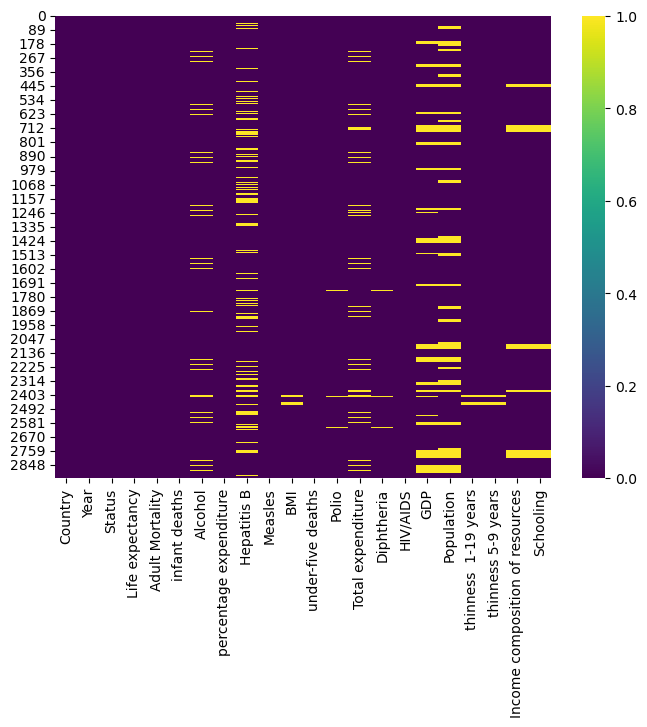

In [551]:
#Missing Values 
plt.figure(figsize=(8, 6));
sns.heatmap(data.isnull(), cmap='viridis')
plt.show()


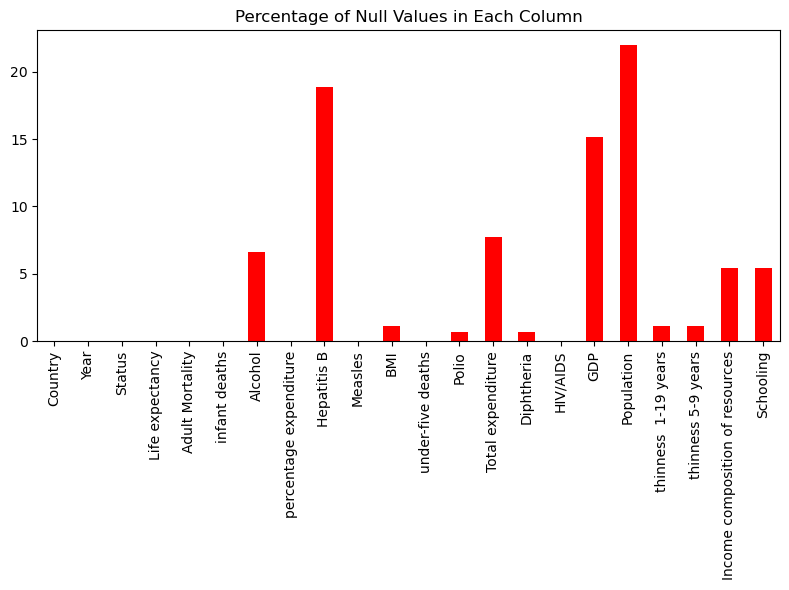

In [552]:
# Calculate the percentage of null values in each column
null_percentages = data.isnull().mean(axis=0) * 100

plt.figure(figsize=(8, 6))
null_percentages.plot(kind='bar', color='red')
plt.title('Percentage of Null Values in Each Column')
# plt.ylabel('Null Value Percentage (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [553]:
# Impute missing values with the mean of each column
for col in data.columns:
    if data[col].isnull().any():
        data[col] = data[col].fillna(data[col].mean())

# data[num_columns] = data[num_columns].fillna(data[num_columns].mean())

In [554]:
data.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

In [555]:
cat_columns = []
num_columns =[]

for col in data.columns:
    if data[col].dtype == 'object':
        cat_columns.append(col)
    else:
        num_columns.append(col)
print(cat_columns)
print(num_columns)

['Country', 'Status']
['Year', 'Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling']


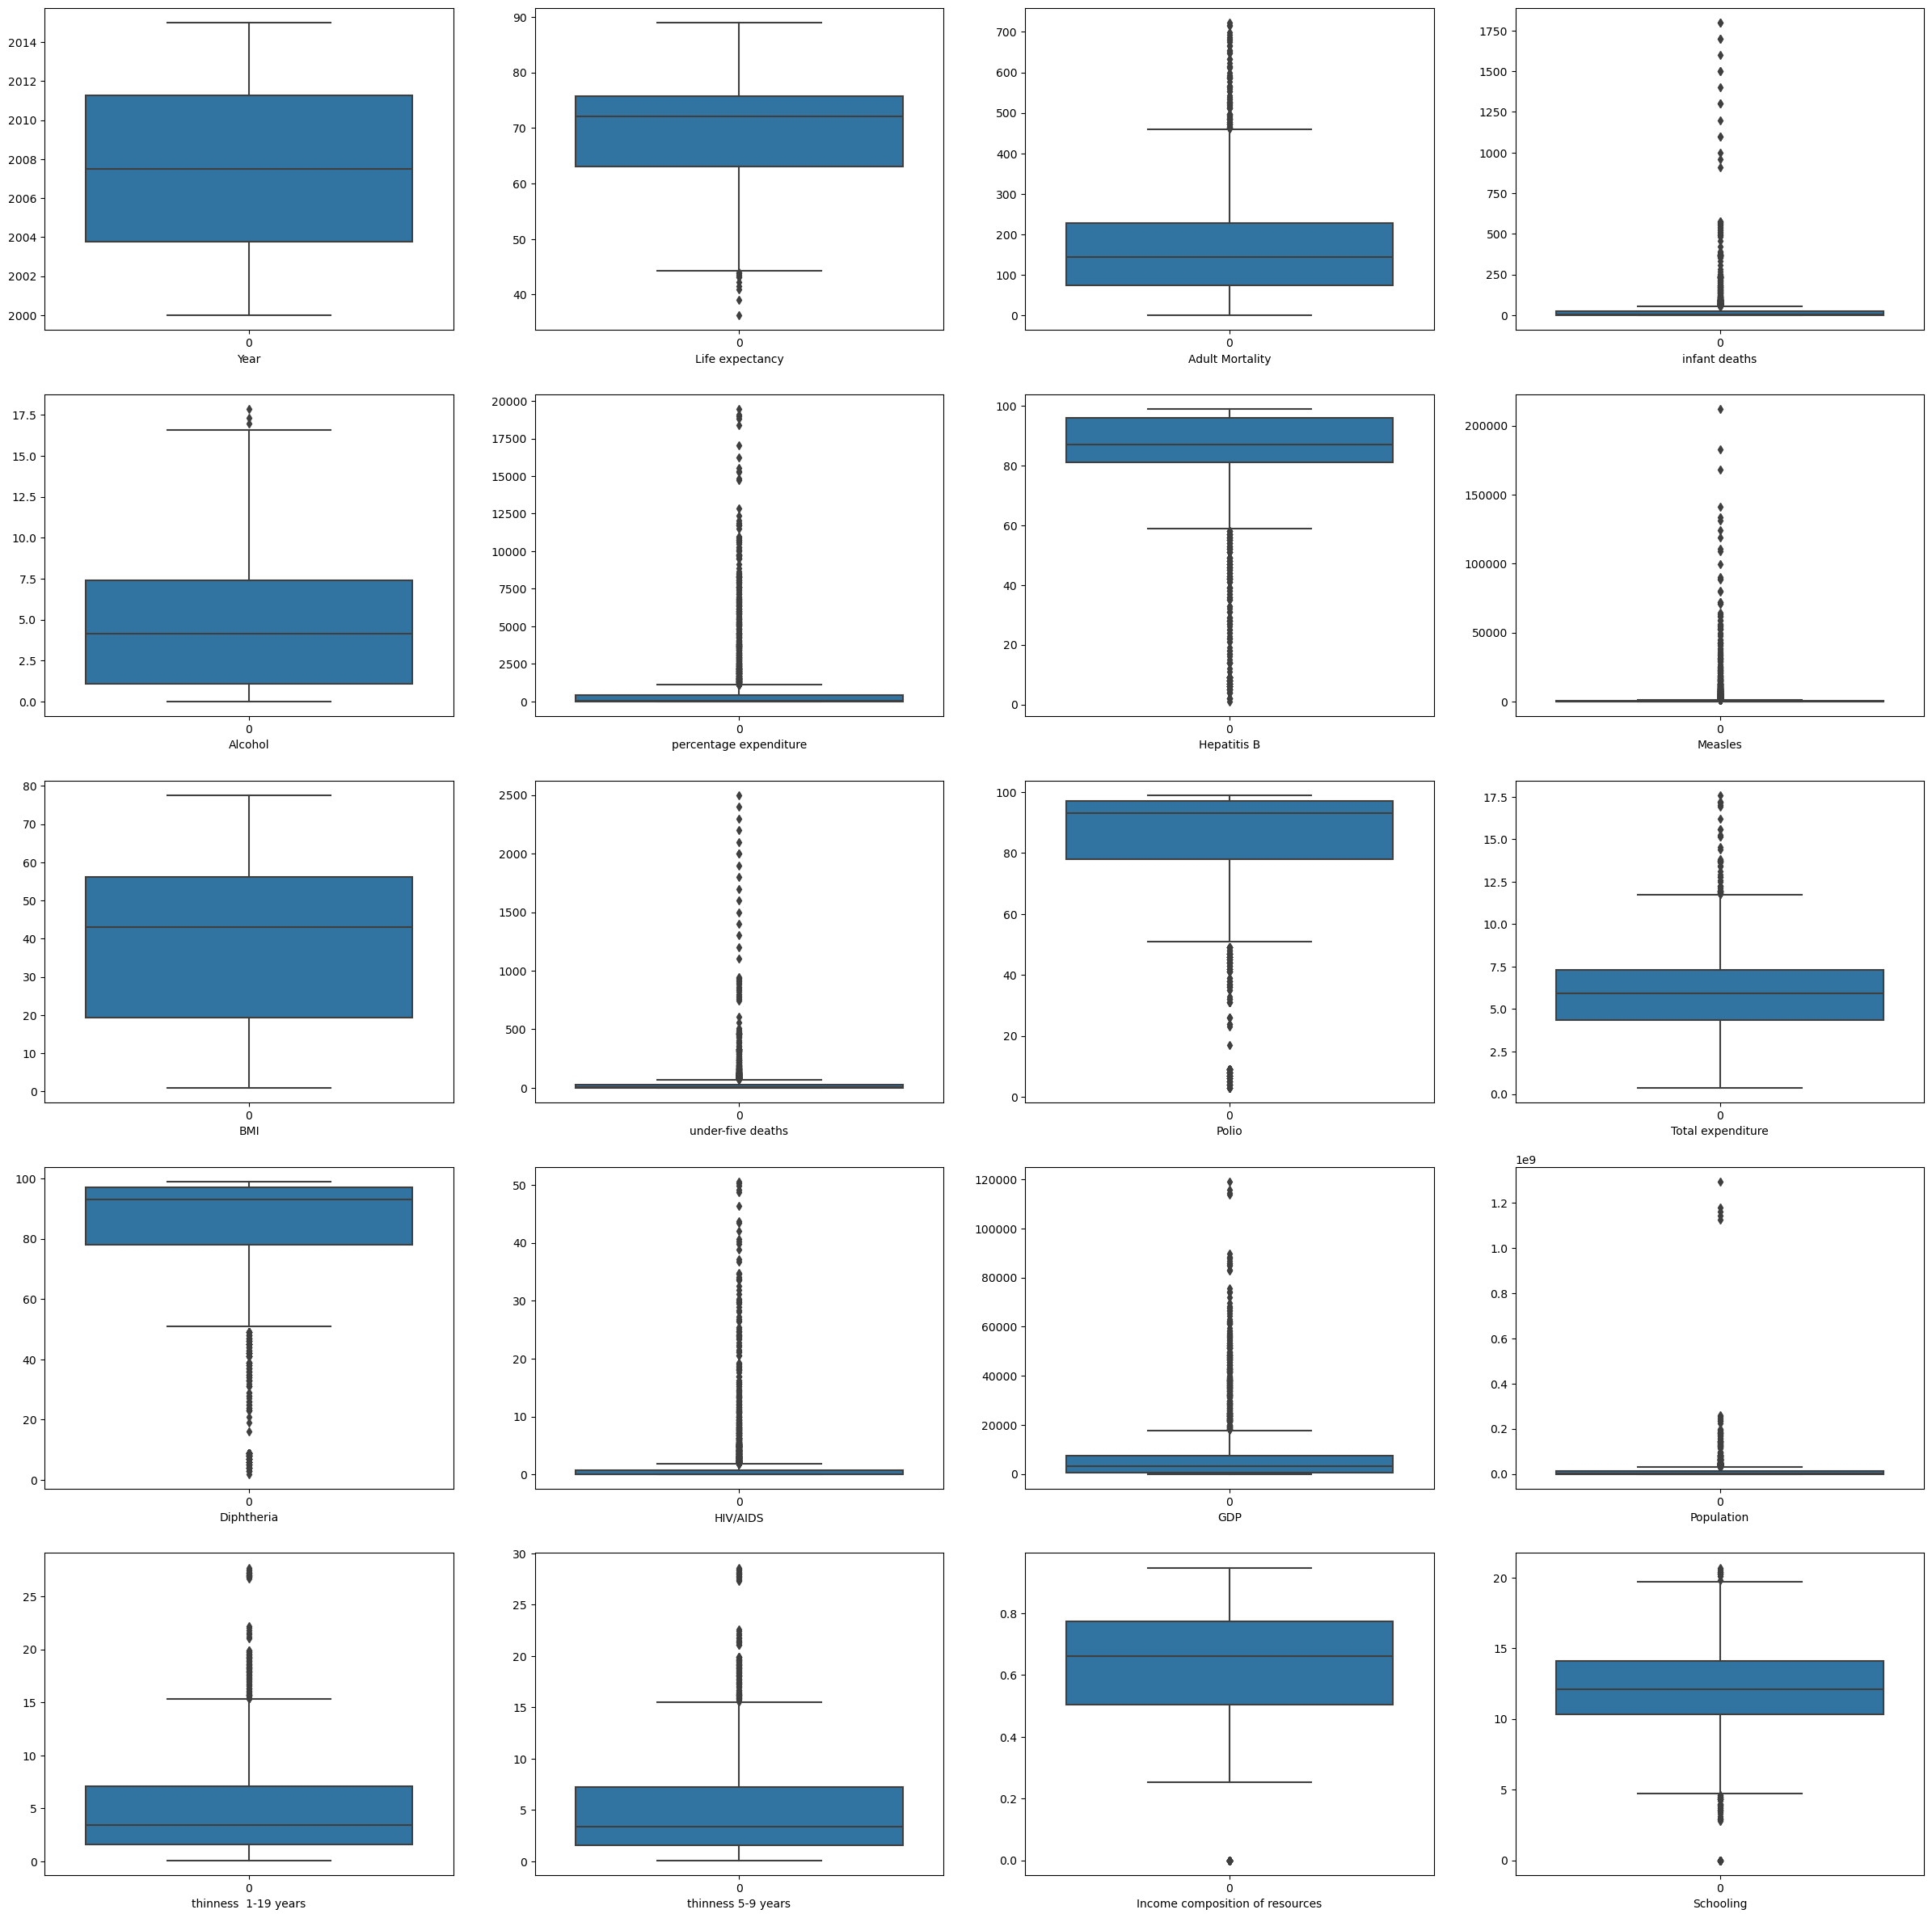

In [556]:
fig = plt.figure(figsize=(30,30))

counter = 0

for col in num_columns:
    sub = fig.add_subplot(5,4,counter+1)
    g = sns.boxplot(data=data[col])
    plt.xlabel(col)
    counter = counter + 1

In [557]:
# Function to detect outliers using IQR approach
def detect_outliers(data_column):
    """
    Calculates IQR and identifies outliers.

    Args:
        data_column (pd.Series): The data column to analyze.

    Returns:
        list: A list of outliers.
    """

    Q1 = data_column.quantile(0.25)
    Q3 = data_column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data_column[(data_column < lower_bound) | (data_column > upper_bound)]
    return outliers.tolist()

In [558]:
 #Calculate and store outlier counts and percentages
outlier_data = {}
for col in num_columns:
    outliers = detect_outliers(data[col])
    outlier_counts = len(outliers)
    outlier_percentages = (outlier_counts / len(data[col])) * 100  # Calculate percentage
    outlier_data[col] = {'count': outlier_counts, 'percentage': outlier_percentages}
    
    print(col)
    print("No. of IQR-based outliers:", outlier_counts)
    print("--------------------------------")

Year
No. of IQR-based outliers: 0
--------------------------------
Life expectancy
No. of IQR-based outliers: 10
--------------------------------
Adult Mortality
No. of IQR-based outliers: 82
--------------------------------
infant deaths
No. of IQR-based outliers: 315
--------------------------------
Alcohol
No. of IQR-based outliers: 3
--------------------------------
percentage expenditure
No. of IQR-based outliers: 388
--------------------------------
Hepatitis B
No. of IQR-based outliers: 314
--------------------------------
Measles
No. of IQR-based outliers: 542
--------------------------------
BMI
No. of IQR-based outliers: 0
--------------------------------
under-five deaths
No. of IQR-based outliers: 394
--------------------------------
Polio
No. of IQR-based outliers: 278
--------------------------------
Total expenditure
No. of IQR-based outliers: 49
--------------------------------
Diphtheria
No. of IQR-based outliers: 297
--------------------------------
HIV/AIDS
No. of IQ

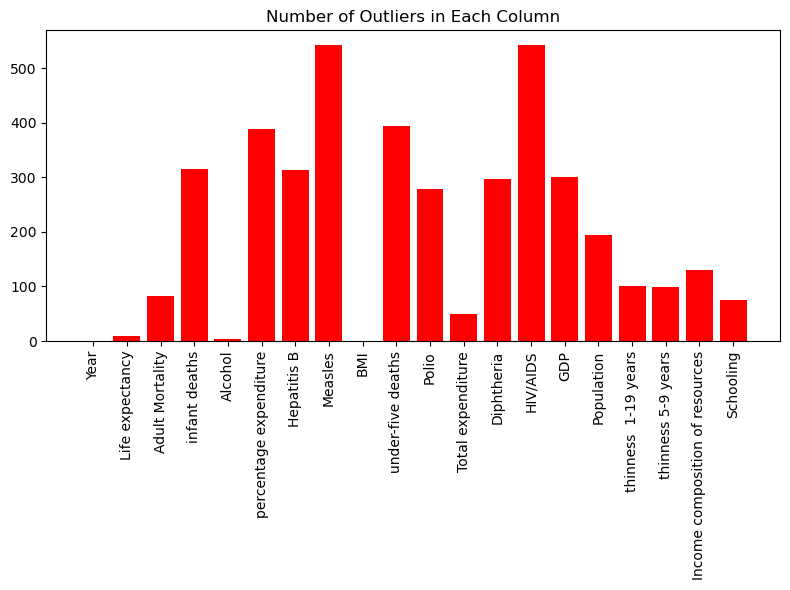

In [559]:
# Plot outlier counts
plt.figure(figsize=(8, 6))
plt.bar(outlier_data.keys(), [v['count'] for v in outlier_data.values()], color='red')
plt.title('Number of Outliers in Each Column')
plt.ylabel('')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

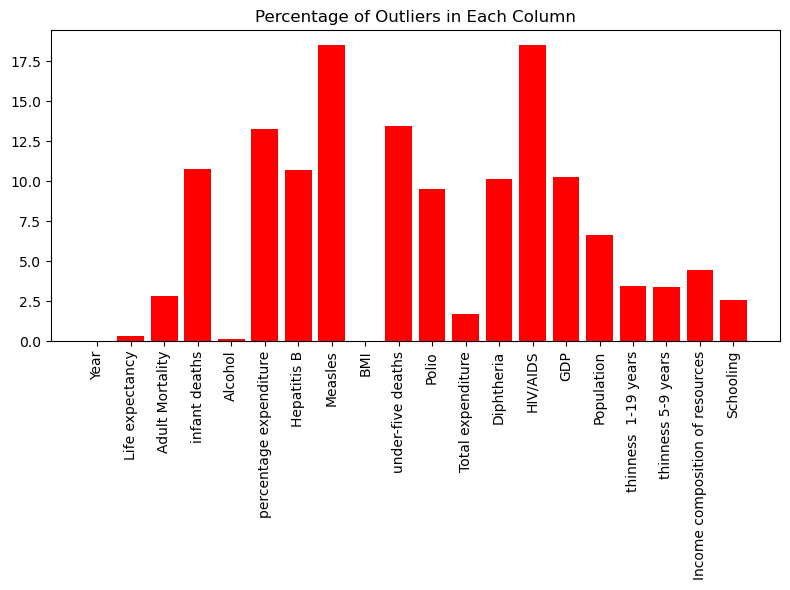

In [560]:
# Plot outlier percentages
plt.figure(figsize=(8, 6))
plt.bar(outlier_data.keys(), [v['percentage'] for v in outlier_data.values()], color='red')
plt.title('Percentage of Outliers in Each Column')
plt.ylabel('')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [561]:
# Replace outliers with column means (handle missing values appropriately)
for col in num_columns:
    outliers = detect_outliers(data[col])
    if outliers:  # Check if there are outliers before replacing
        mean_value = data[col].mean()  # Calculate mean (consider handling missing values)
        data.loc[data[col].isin(outliers), col] = mean_value  # Replace outliers with mean

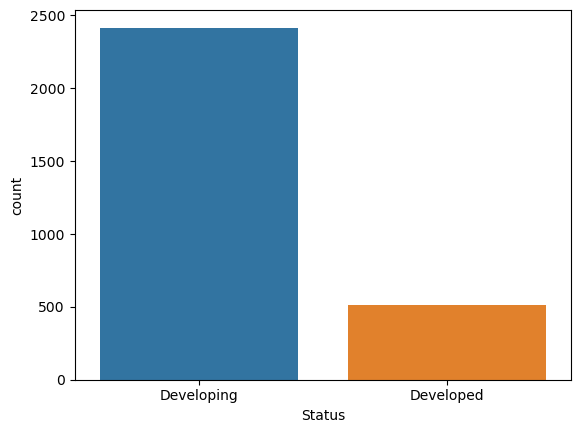

In [562]:
#Data Visualization
g = sns.countplot(x="Status",data=data)
plt.xticks()
plt.show()

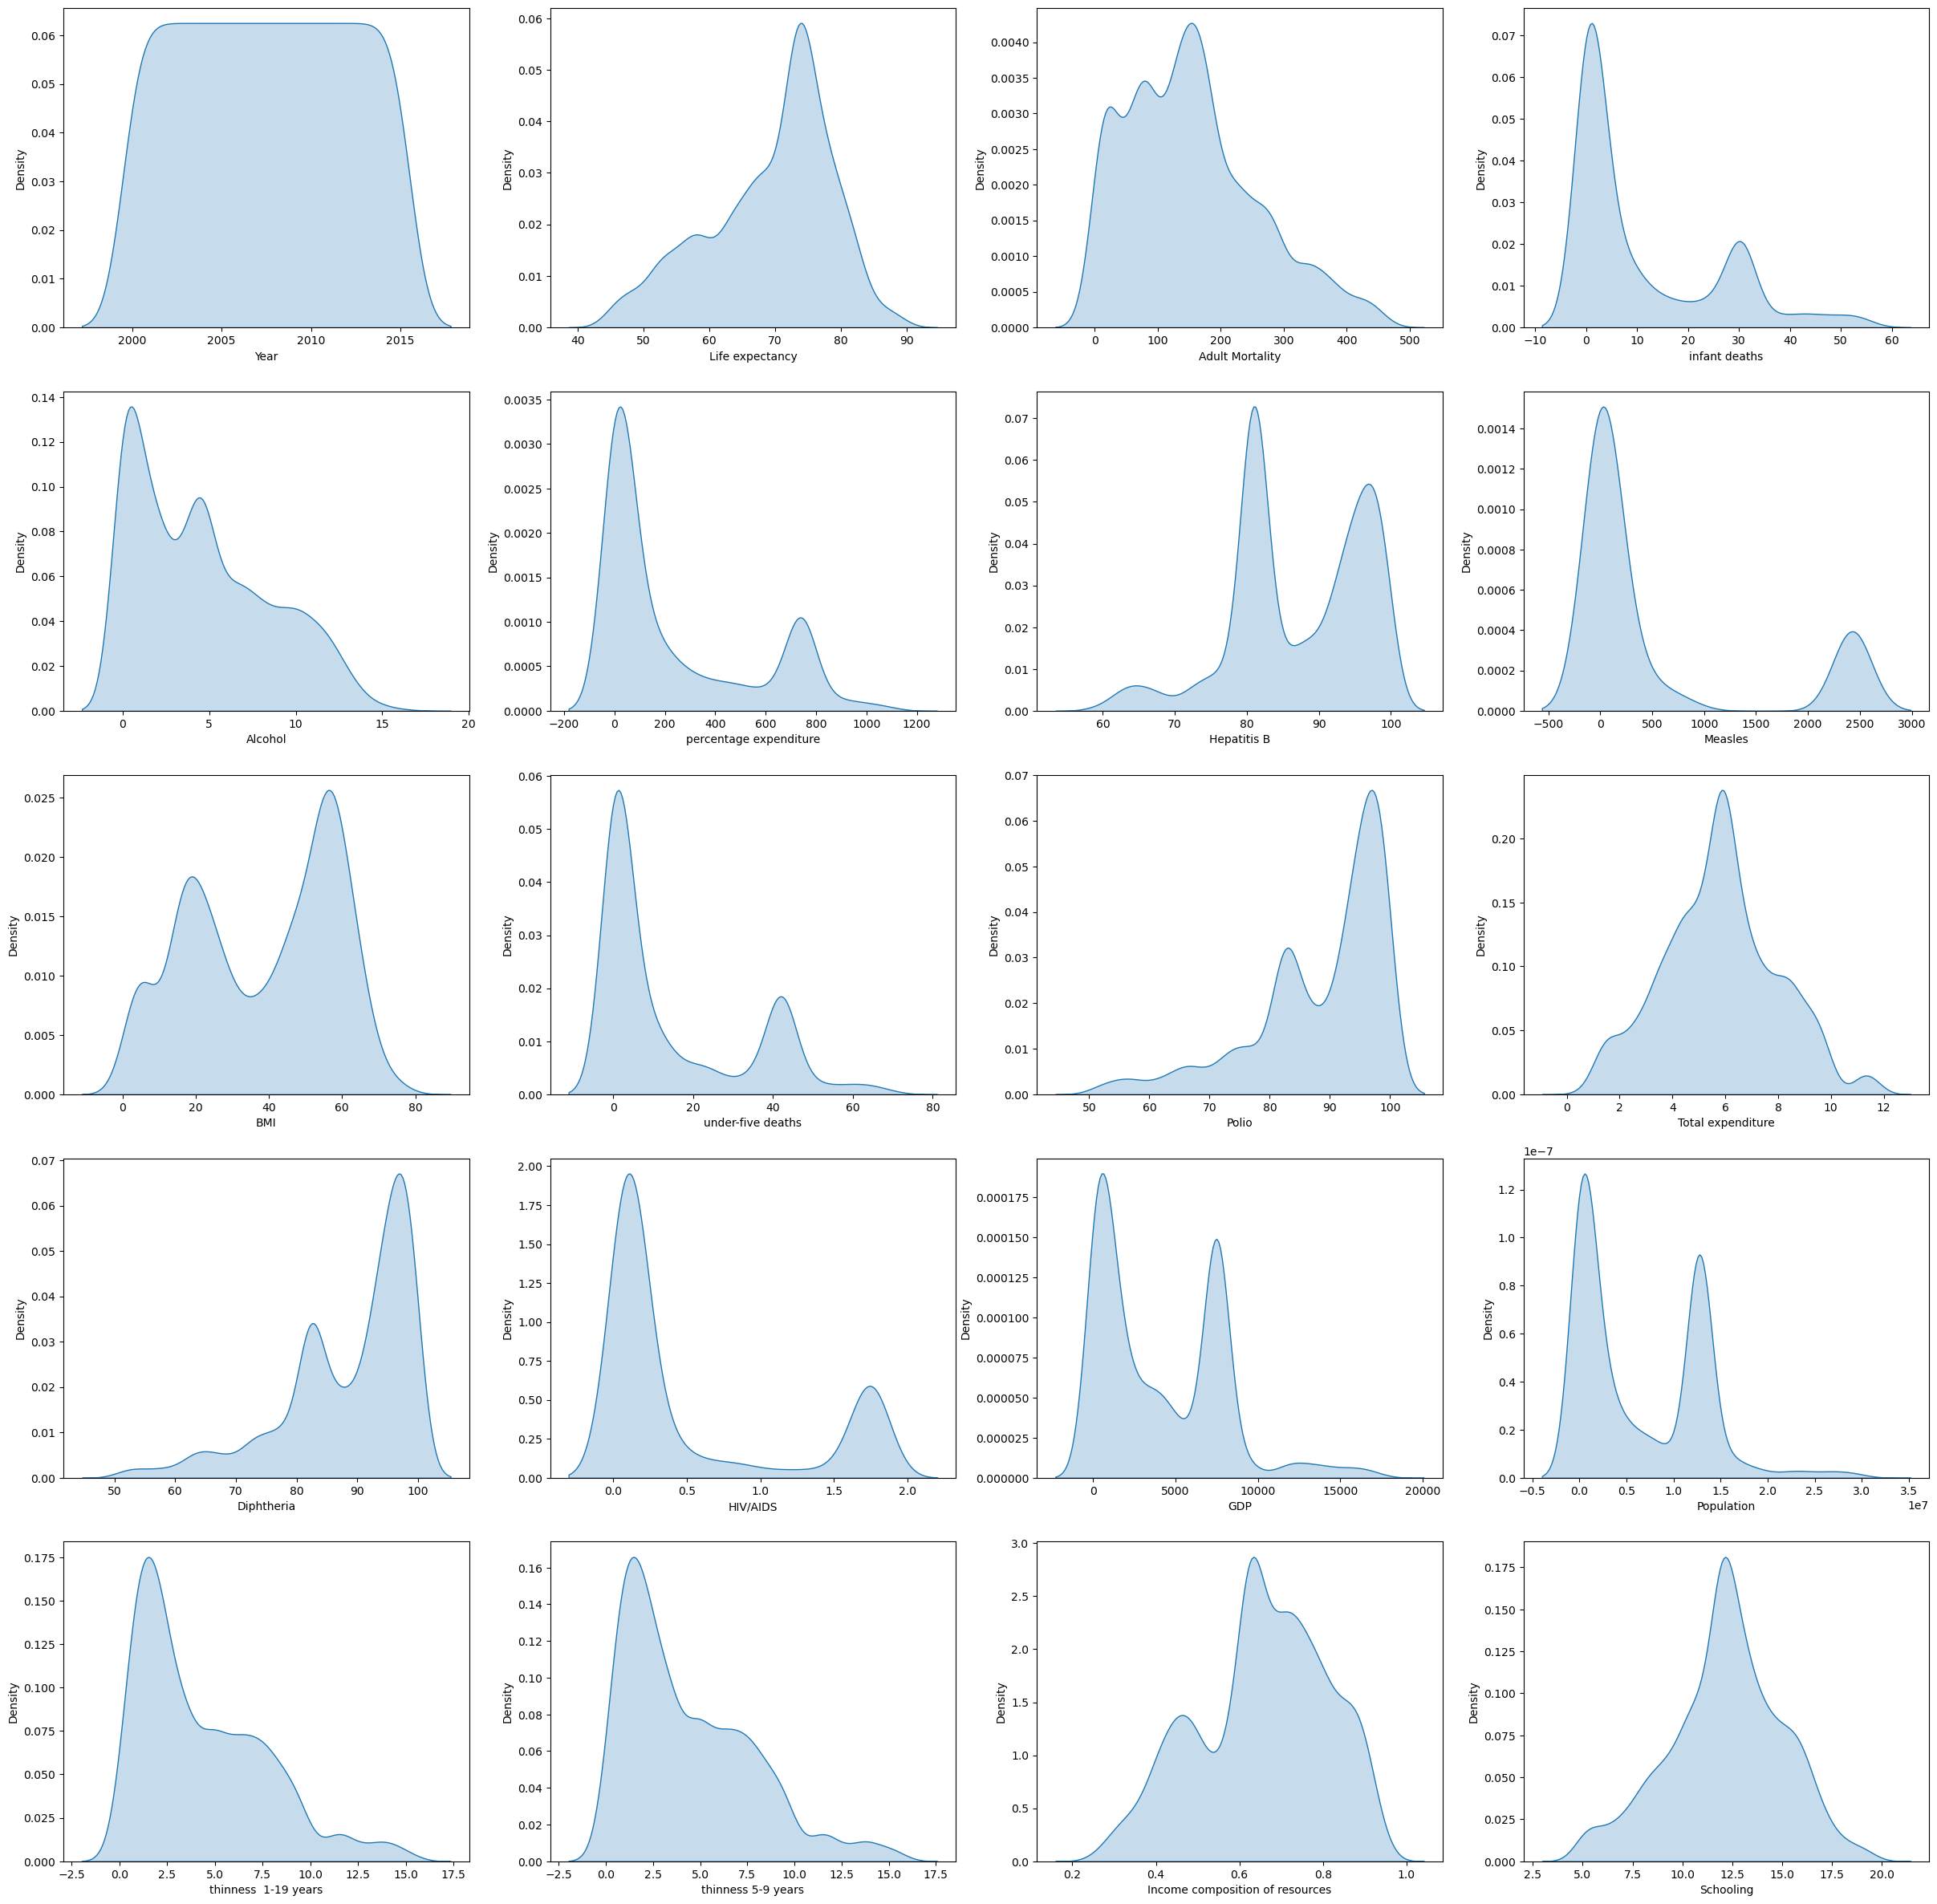

In [563]:
fig = plt.figure(figsize=(30,30))

counter = 0

for col in num_columns:
    sub = fig.add_subplot(5,4,counter+1)
    g = sns.kdeplot(x=col,data=data,fill=True)
    plt.xticks()
    counter = counter + 1

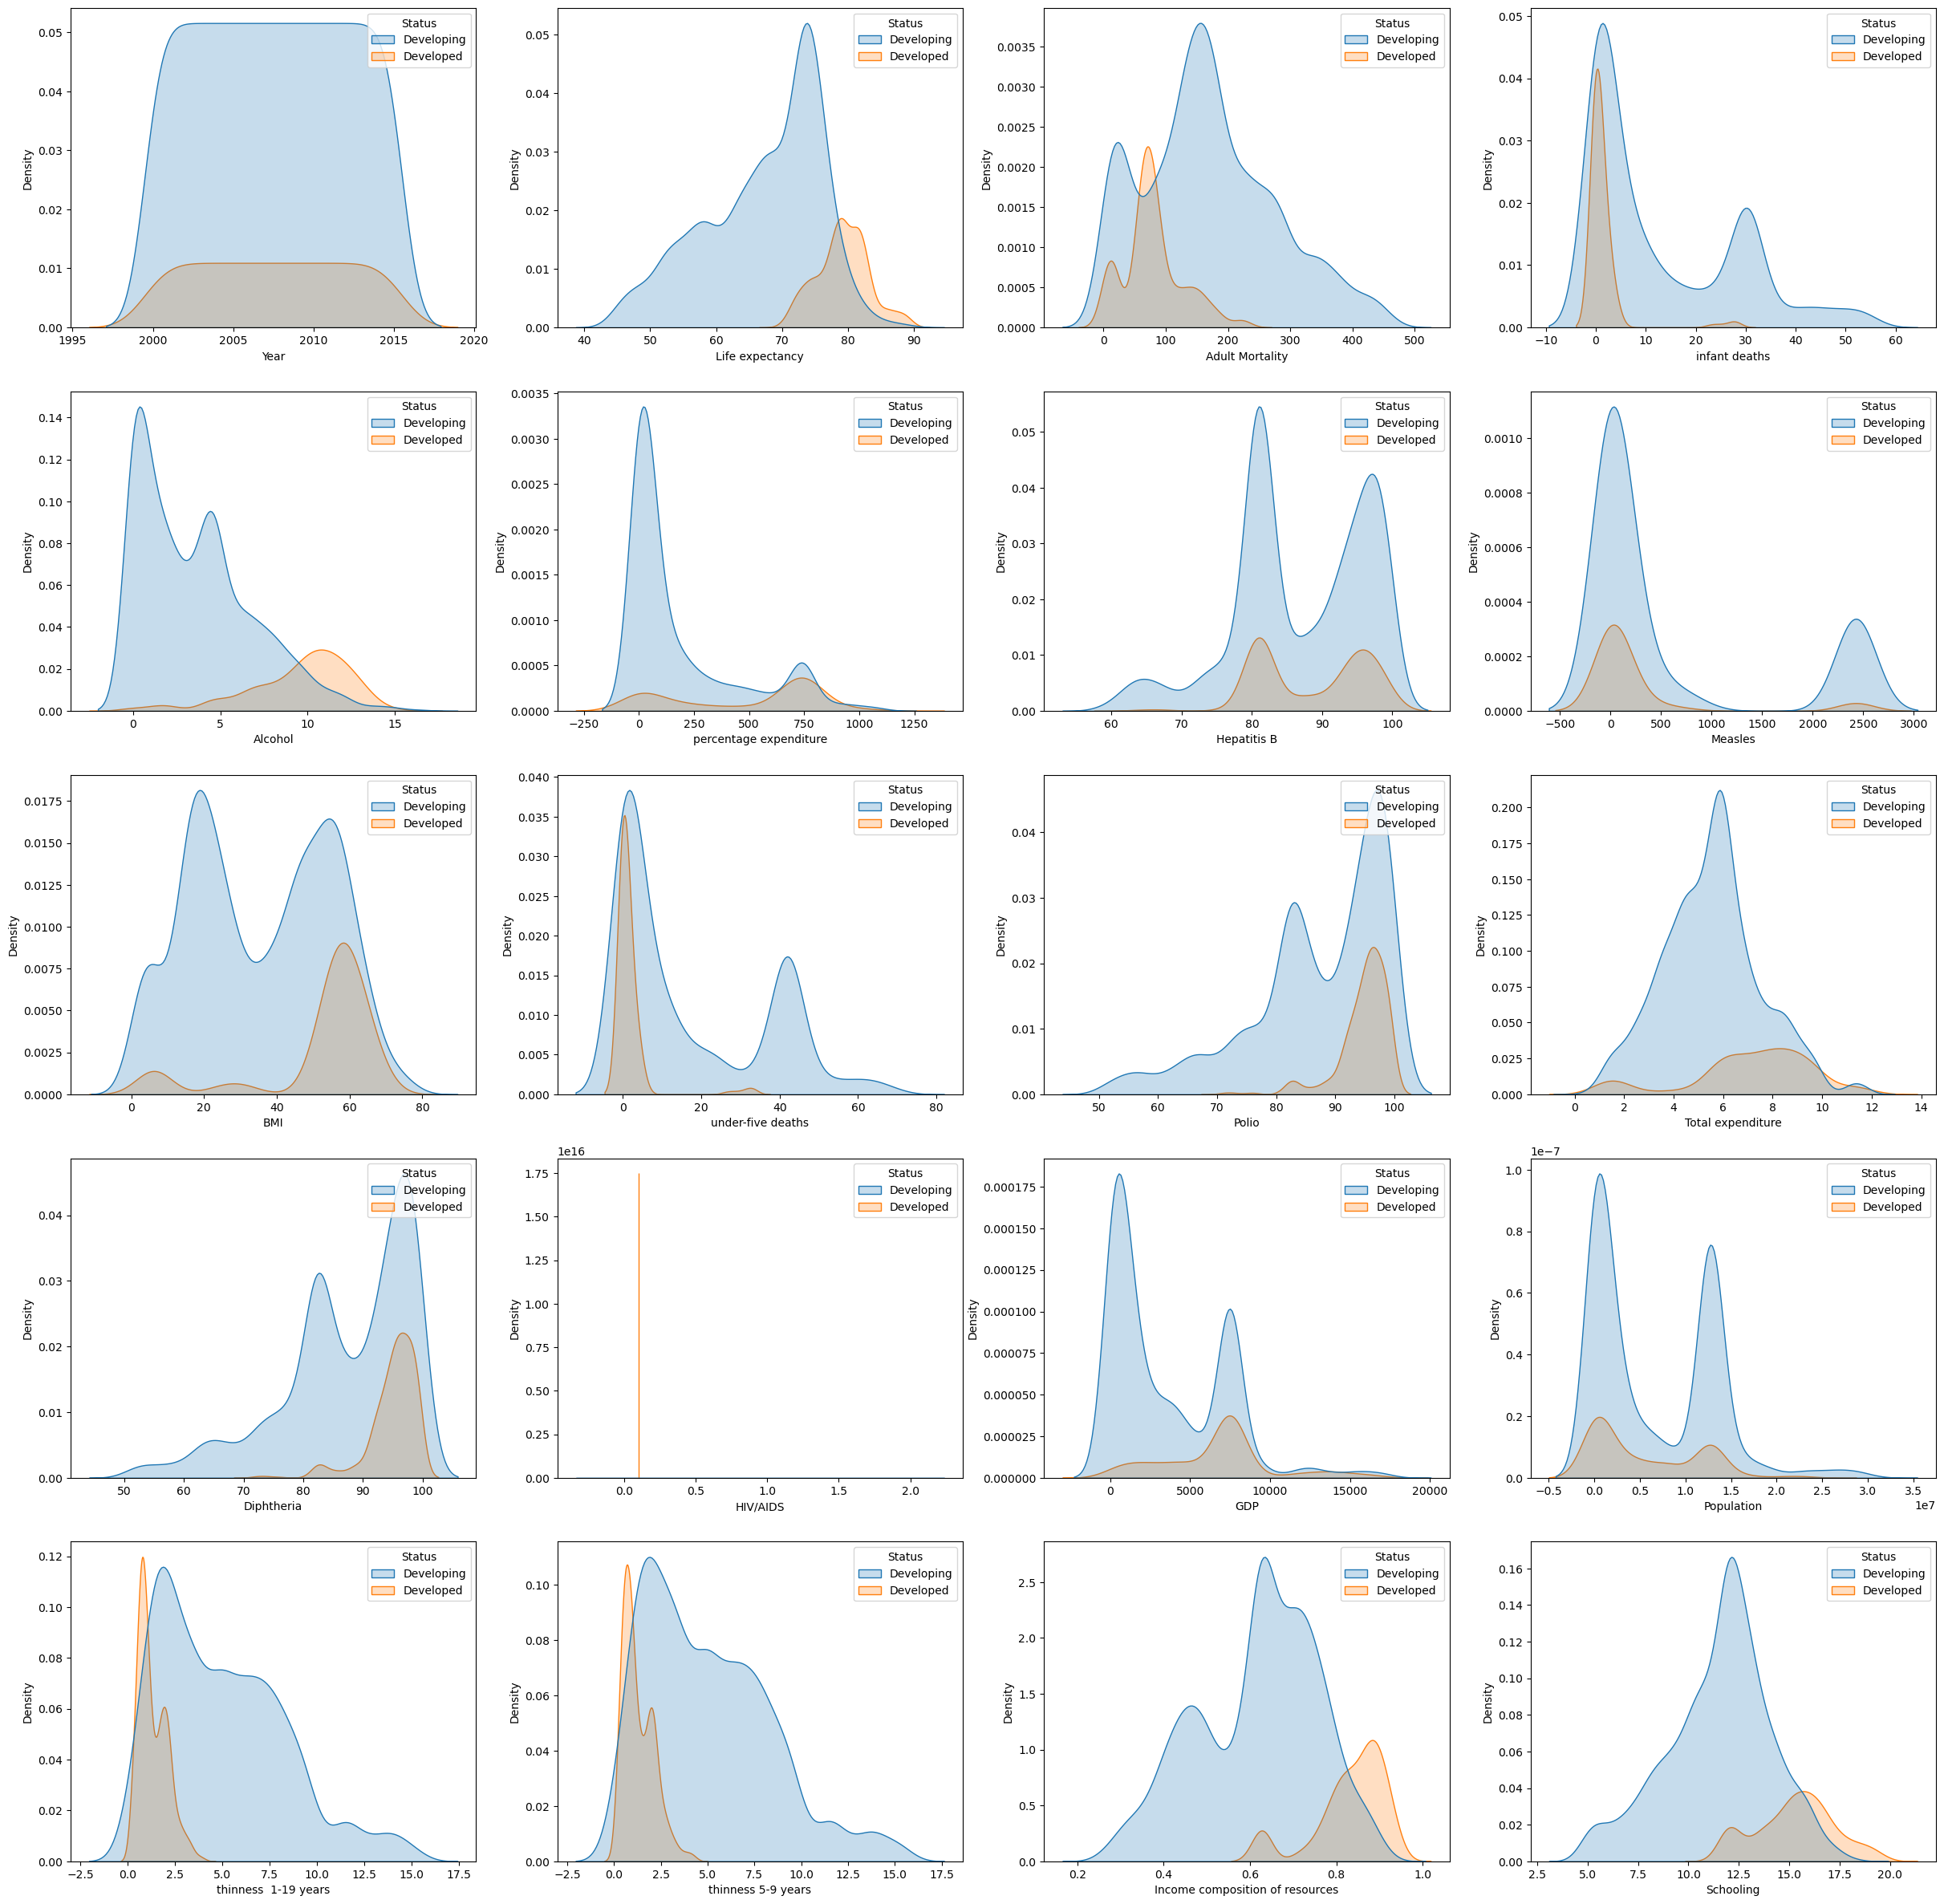

In [564]:
fig = plt.figure(figsize=(30,30))

counter = 0

for col in num_columns:
    sub = fig.add_subplot(5,4,counter+1)
    g = sns.kdeplot(x=col,data=data,fill=True,hue="Status")
    plt.xticks()
    counter = counter + 1

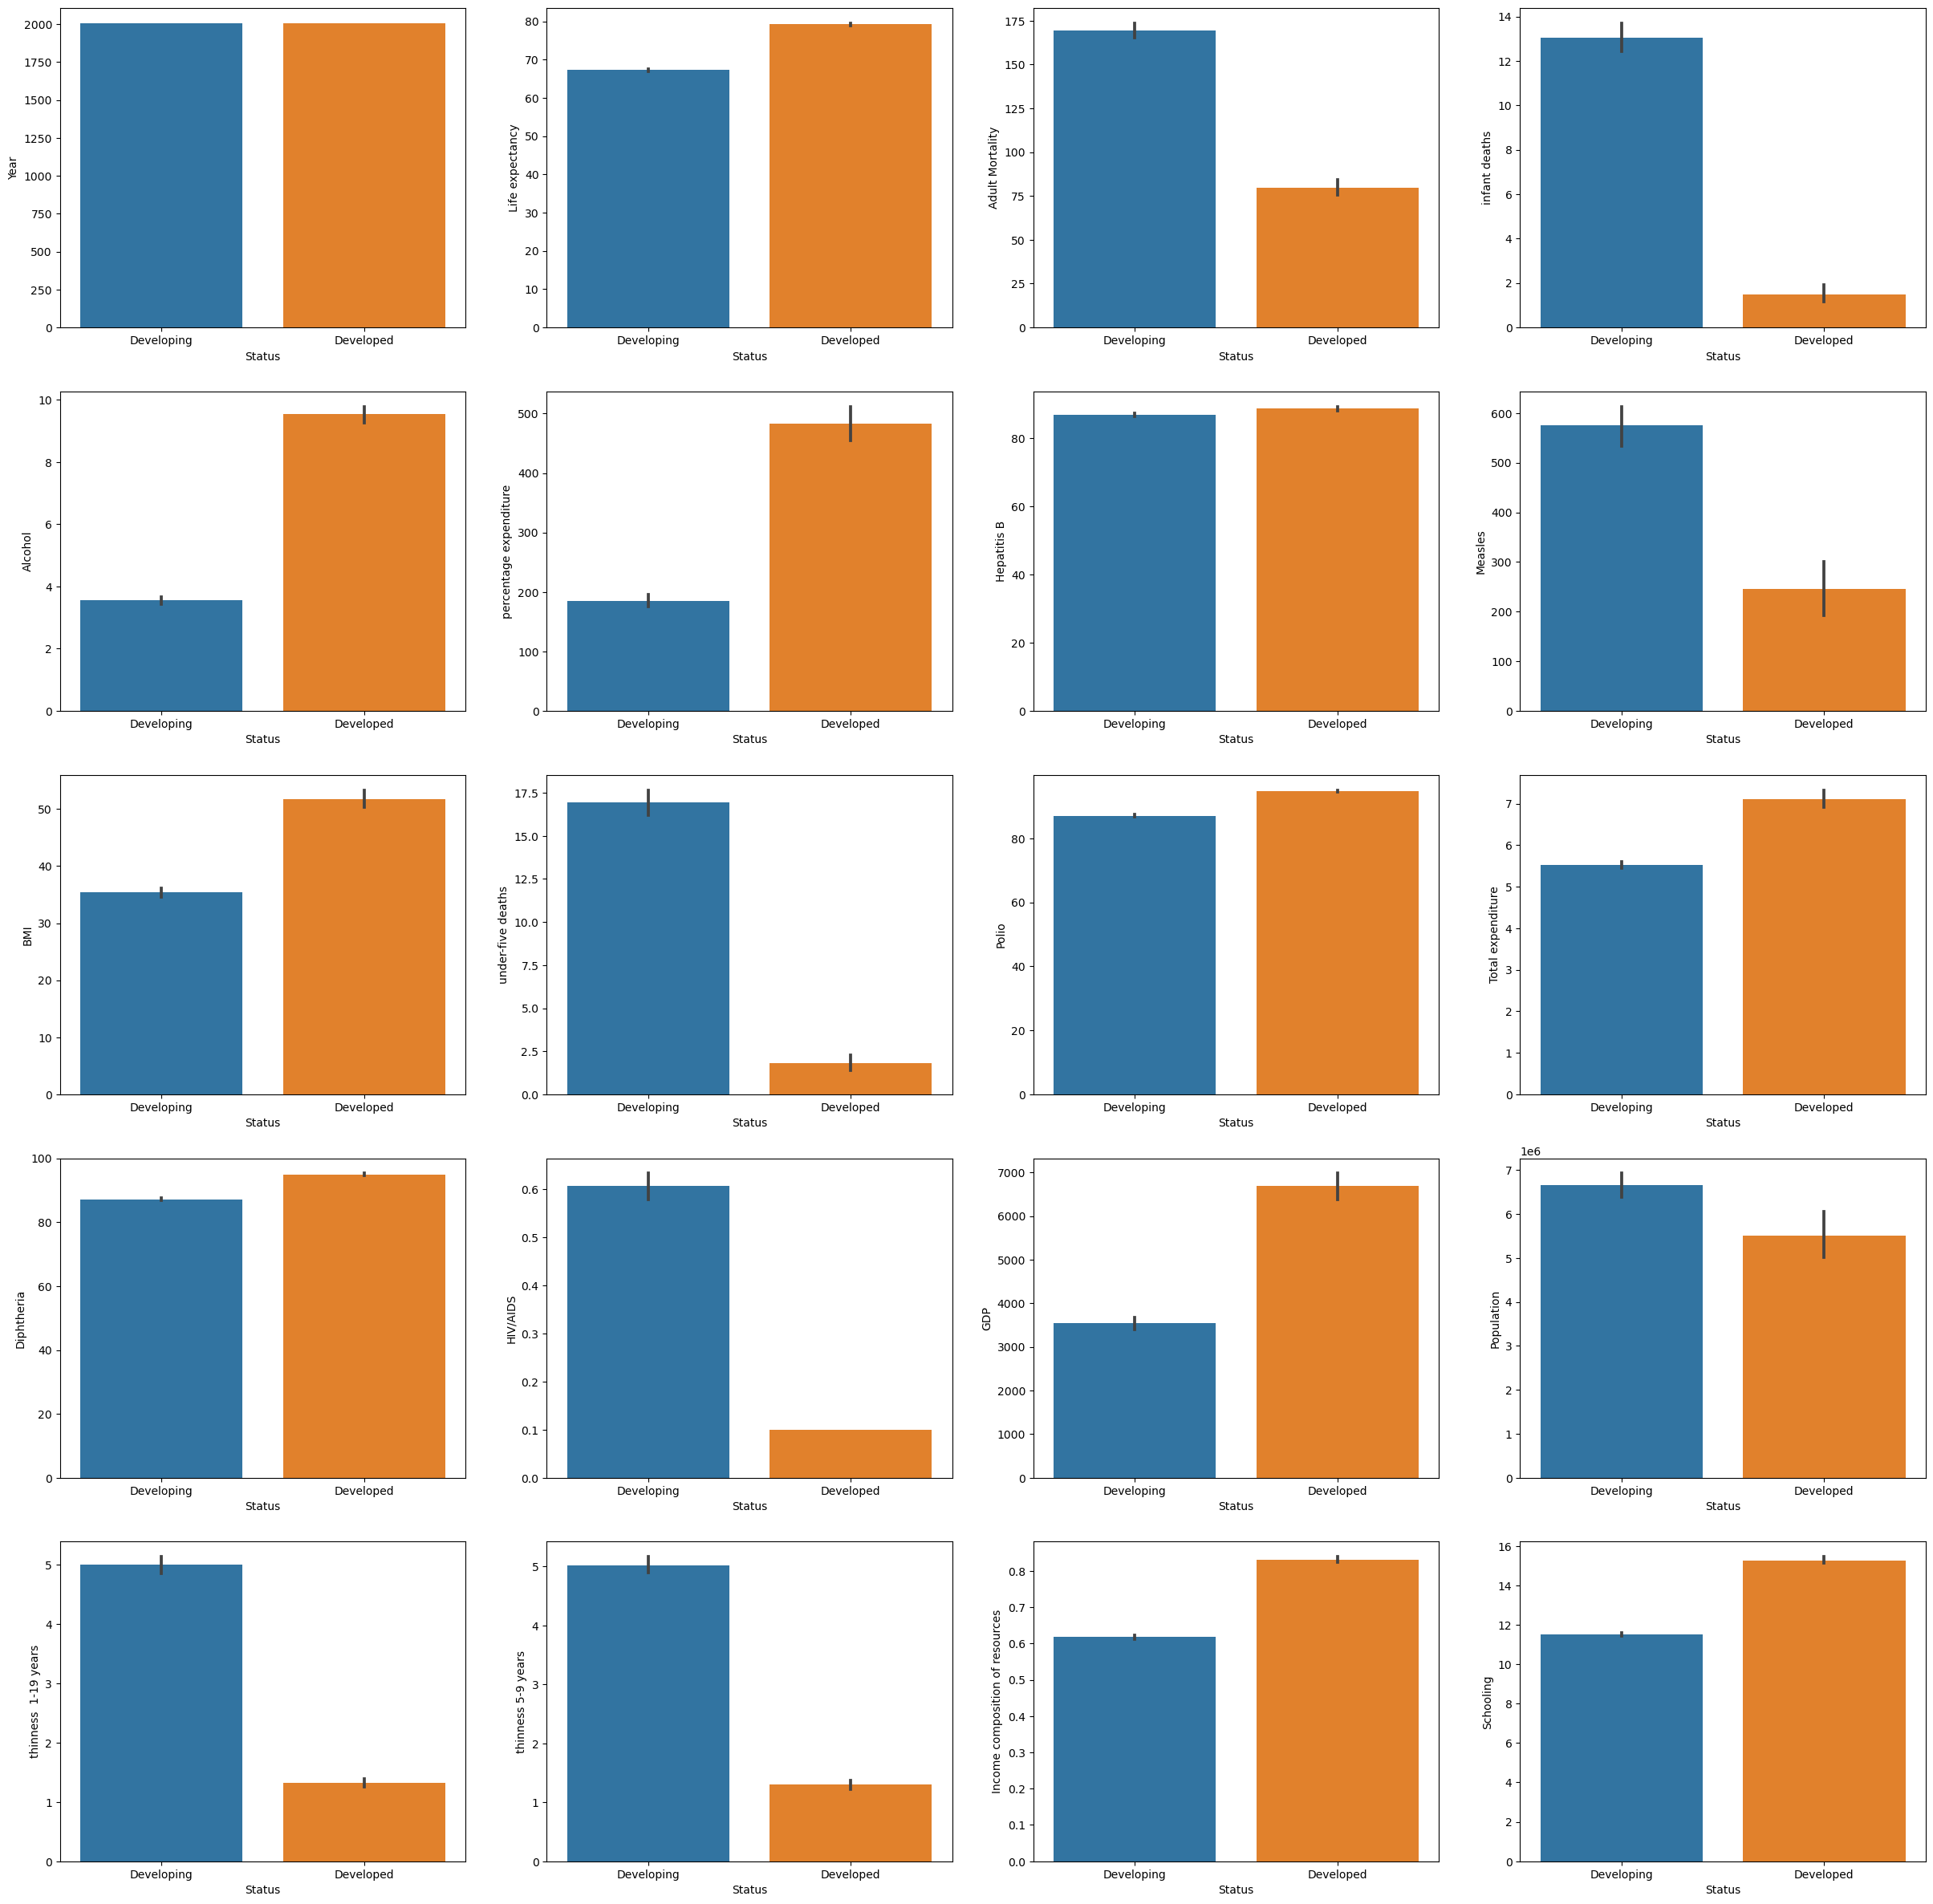

In [565]:
fig = plt.figure(figsize=(30,30))

counter = 0

for i in data.columns:
    if (data[i].dtype != 'object'):
        sub = fig.add_subplot(5,4,counter+1)
        g = sns.barplot(y=i,data=data,x='Status')
        plt.xticks()
        counter = counter + 1

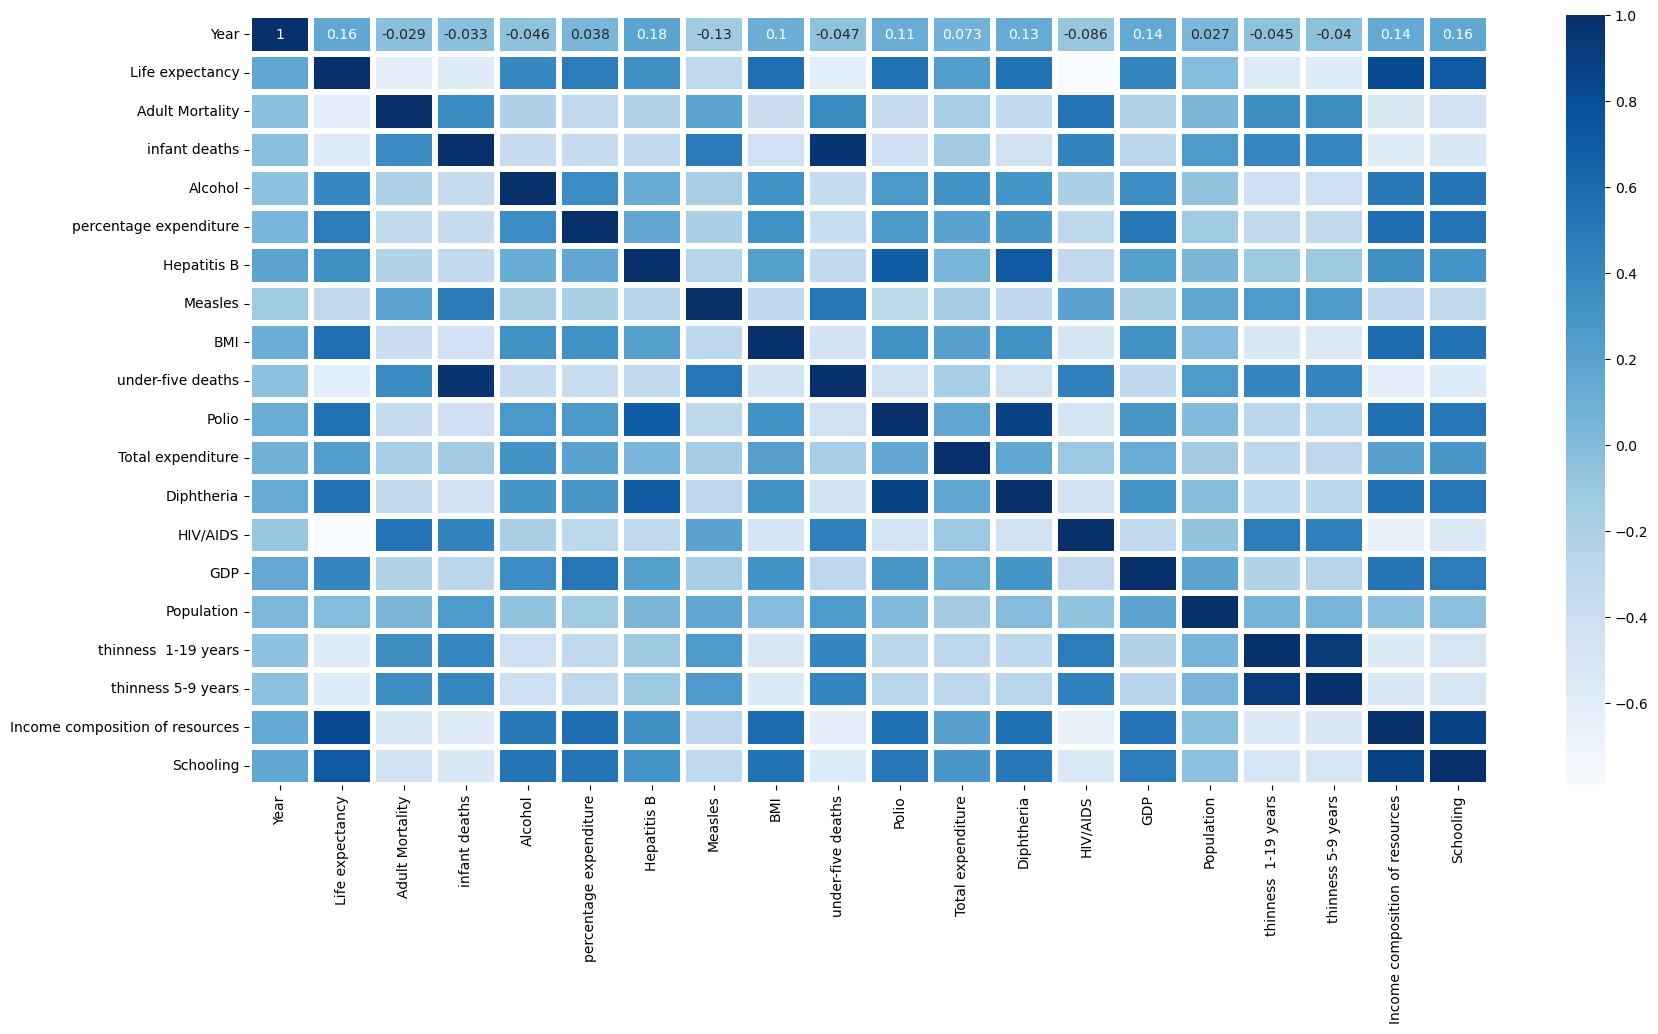

In [566]:
plt.figure(figsize = (20,10))

sns.heatmap(data[num_columns].corr(), cmap='Blues' ,linewidths= 3,annot = True)
plt.show()

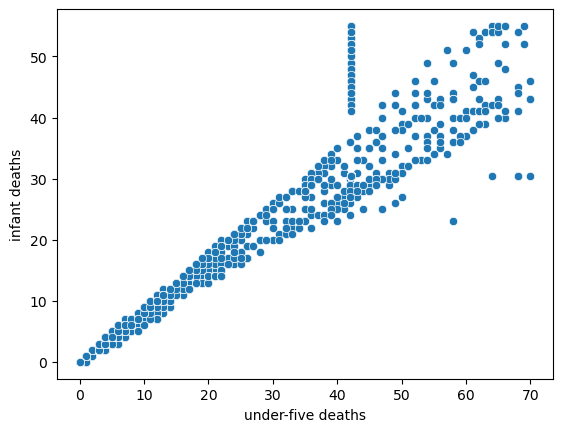

In [567]:
sns.scatterplot(x ='under-five deaths' , y = 'infant deaths' , data = data )
plt.show()

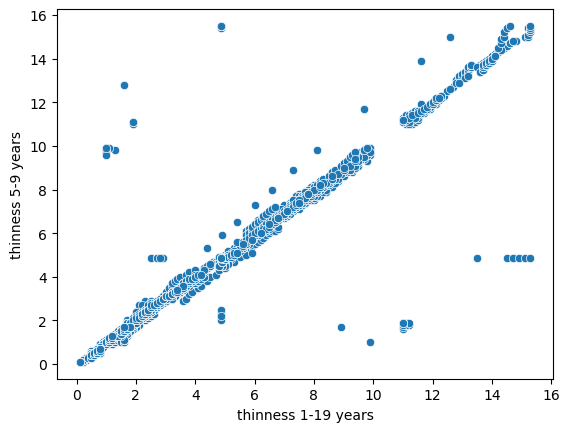

In [568]:
sns.scatterplot(x=data['thinness  1-19 years'], y=data['thinness 5-9 years'])
plt.xlabel('thinness 1-19 years')
plt.ylabel('thinness 5-9 years')
plt.show()

In [569]:
data = data.drop(columns=["thinness 5-9 years", "infant deaths"])

In [570]:
# tools Modeling
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# models
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression


# metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix ,ConfusionMatrixDisplay

In [571]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [572]:
#Splitting data
X = data.drop(columns=["Life expectancy","Year", "Country"])
y = data["Life expectancy"]

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [573]:
print("The Shape of X_train is :",X_train.shape)
print("The Shape of y_train is :",y_train.shape)
print("The Shape of X_test is :",X_test.shape)
print("The Shape of y_test is :",y_test.shape)

The Shape of X_train is : (2342, 17)
The Shape of y_train is : (2342,)
The Shape of X_test is : (586, 17)
The Shape of y_test is : (586,)


In [574]:
#preprocessing categorical columns
cat_col = [col for col in X.columns if X[col].dtype == 'object']
print(cat_col)

['Status']


In [575]:
encoder = LabelEncoder()

X_train['Status'] = encoder.fit_transform(X_train['Status'])
X_test['Status'] = encoder.transform(X_test['Status'])

In [576]:
#preprocessing numerical columns
num_cols = [col for col in X.columns if X[col].dtype != 'object']
print(num_cols)

['Adult Mortality', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years', 'Income composition of resources', 'Schooling']


In [577]:
sc = StandardScaler()

X_train[num_cols] = sc.fit_transform(X_train[num_cols])
X_test[num_cols] = sc.transform(X_test[num_cols])

In [578]:
X_train.head()

,Status,Adult Mortality,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,Income composition of resources,Schooling
2259,1,-0.277402,1.238569,1.684866,1.089821,-0.557909,1.015081,-0.724241,0.429408,1.904181,0.247583,-0.643488,0.434059,-0.882224,-0.666616,0.734390,0.643574
1677,1,0.233439,-0.116170,0.441970,0.108164,-0.557909,-0.584448,-0.778382,-0.028912,-0.706821,-0.037270,-0.643488,-0.018309,-0.972723,1.025247,0.194656,0.123506
2775,1,2.132226,-0.297146,-0.790100,-0.109982,2.077342,-0.925413,1.505257,0.062752,-0.720684,-0.227172,1.848051,0.921769,0.948659,0.850227,-0.162476,-0.049976
2503,0,-0.894267,0.597395,1.677567,-0.659618,-0.530774,0.924826,-0.778382,0.887728,1.599179,0.912240,-0.643488,0.921769,0.409802,-0.899977,1.569692,1.232985
1088,1,1.158736,0.006599,-0.790100,-0.000909,-0.391840,-0.589462,-0.453535,-0.120576,0.074245,-0.132221,1.848051,-0.911590,-0.964681,0.791887,-1.488799,-1.020645


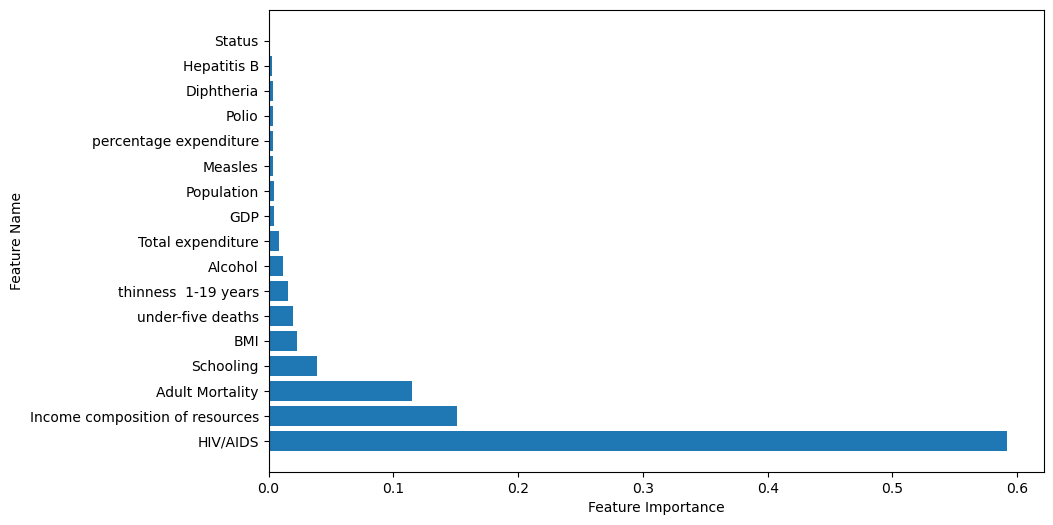

In [579]:
# Create and train a Random Forest classifier
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

feature_importance = model.feature_importances_

# Create a DataFrame to associate feature names with their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
# plt.title('Feature Importance')
plt.show()

In [580]:
#Models
model_name= []
RMSE = []
R2_score = []

models = [
    DecisionTreeRegressor(random_state = 42),
    RandomForestRegressor(random_state = 42),
    GradientBoostingRegressor(random_state = 42),
    LinearRegression(),
    XGBRegressor(random_state = 42),
    ExtraTreeRegressor(random_state=42)
]

for model in models :
    model.fit(X_train , y_train)
    
    prediction = model.predict(X_test)
    
    model_name.append(model.__class__.__name__)
    
    RMSE.append(str(mean_squared_error( prediction , y_test, squared=False )))
    R2_score.append(str(r2_score( y_test , prediction ) * 100 ) + " %")

In [581]:
models_df = pd.DataFrame({"Model-Name":model_name, "RMSE": RMSE, "R2_Score":R2_score})
models_df = models_df.set_index('Model-Name')
models_df.sort_values("R2_Score", ascending = False)

,RMSE,R2_Score
Model-Name,,
RandomForestRegressor,2.08114914168936,94.84977712444122 %
XGBRegressor,2.141374052194936,94.5473868479248 %
GradientBoostingRegressor,2.5532493306673114,92.2481373613846 %
DecisionTreeRegressor,2.8867108014510556,90.09108348123294 %
ExtraTreeRegressor,3.1236516869758146,88.3976806263401 %
LinearRegression,3.9204029260362314,81.72400526077078 %
